# Information Retrieval: Programming Assignment \#5

### Sheetal Parikh
EN.605.744.81<br>
November 15, 2021
***
***

In [1]:
#imports for notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os 
import csv

import sys
import re
import nltk
import string
import struct
import re
import math
import argparse
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal\datasets") 

#checking current directory
#print(os.getcwd() + "\n")

#direct path to files
filepath = '/Users/Sheetal/Documents/Sheetal/datasets/19991220-Excite-QueryLog.tsv'

### Reading in Files

In [2]:
#reading in files as a pandas dataframe
data = pd.read_csv(filepath, sep='\t', header=None,names=["Timestamp", "Userid", "FirstRank", "Query"])

In [3]:
# Sanity check for file
print(f'N rows={len(data)}, M columns={len(data.columns)}')

#print first few rows to visualize the dataset
data.head(20)

N rows=2450086, M columns=4


,Timestamp,Userid,FirstRank,Query
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...
1,90000,95A33E619934A39B,0,wirehair pointing griffon
2,90000,E613C21C535BC636,30,ncic
3,90000,00CD4DE085A391DD,0,+ER +home +TV +Romano +picture
4,90000,5F48819400DB52D7,0,adolescent won't sleep in own bed
5,90000,D87CE5C149126B4B,0,where can i find free porno passwords
6,90000,47F6F715137F7C8D,0,play station codes . com
7,90000,40B1AACE633D9AC9,30,birth control and depression
8,90000,43D7E2332D3631DC,0,government
9,90000,87BE88FDCB1F7629,0,WorkAbility I+conference


In [4]:
#checking for missing values in set
data.isnull().sum()

Timestamp      0
Userid         0
FirstRank      0
Query        160
dtype: int64

In [5]:
#finding the length
n_queries = len(data)
n_queries

2450086

In [6]:
#checking for null values in the dataset
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

In [7]:
#the queries with null values
nan_queries = len(rows_with_NaN)
nan_queries

160

In [8]:
#total queries after removing the null queries
n_queries = n_queries - nan_queries
n_queries

2449926

In [9]:
#changing pandas dataframe to numpy array because numpy will process the data much faster than pandas
data_np = data.to_numpy()
data_np

array([[90000, 'B0A0F80A06A3AB6C', 0,
        'In what year did baseball become an offical sport?'],
       [90000, '95A33E619934A39B', 0, 'wirehair pointing griffon'],
       [90000, 'E613C21C535BC636', 30, 'ncic'],
       ...,
       [165959, '32E290F942064B3A', 0, 'body surface area drug dosage'],
       [165959, '4D71604181DC294A', 10, 'SLSA AND Australia'],
       [165959, '302D2CA498C522F4', 0, 'start up win95']], dtype=object)

I primarily used numpy instead of pandas for the analysis as numpy should generally have beter performance with large datasets. Also as seen above, there were 160 rows with NaN queries.  I will use the query total of 2,449,926 when calculating the average number of queries and query percentages below. 

### Q1. What is the average number of queries per user id?

In [10]:
#userID is the 2nd row of the dataset
userID = data_np[:,1]

#determining the number of users
userID_unique = np.unique(userID)

print(f'There are {n_queries} queries and {len(userID_unique)} users in the dataset.')
print(f'The average number of queries per user id is about: {round(n_queries/len(userID_unique),2)} queries')

There are 2449926 queries and 535198 users in the dataset.
The average number of queries per user id is about: 4.58 queries


### Q2. Report the mean and median query length in both words and characters.

In [11]:
#the query is the 4th row of the dataset
query = data_np[:,3]

#converting array to list and then to string
query1 = query.tolist()
query2 = list(map(str, query1))

#### Mean and Median Query Length in Characters

In [12]:
#average query length in characters - taking the length of characters per character divided by all queries
avgQuery_char = sum([len(i) for i in query2])/n_queries

#rounding and reporting the mean
print(f'The mean query length in characters is: {round(avgQuery_char,2)}')

The mean query length in characters is: 20.95


In [13]:
#counting character length per query
char_length = [len(i) for i in query2]

#rounding and reporting the median
print(f'The median query length in characters is: {round(np.median(char_length),2)}')

The median query length in characters is: 17.0


The number of character per query was calculated by taking the length of each query.

#### Mean and Median Query Length in Words

In [57]:
#counting number of words per query
num_words = [len(sentence.split()) for sentence in query2]

num_words[:20]

[9, 3, 1, 5, 6, 7, 5, 4, 1, 2, 2, 7, 4, 2, 2, 9, 3, 13, 2, 2]

In [15]:
print(f'The mean query length in words is: {round(np.mean(num_words),2)}')
print(f'The median query length in words is: {round(np.median(num_words),2)}')

The mean query length in words is: 3.32
The median query length in words is: 2.0


The split() function was used to divide each query into words.  I didn't preprocess the data as I wanted to include all words, including stop words, in the count.

### Q3. What percentage of queries are mixed case? All upper case? All lower case?

#### Lower Case Queries

In [16]:
#counting lowercase queries
lowerCase = [sentence.islower() for sentence in query2]
total_lc = sum(lowerCase)
print(f'The percentage of lower case queries is: {"{:.2%}".format(total_lc/n_queries)}')

The percentage of lower case queries is: 66.91%


#### Upper Case Queries

In [17]:
#counting uppercase queries
upperCase = [sentence.isupper() for sentence in query2]
total_uc = sum(upperCase)
print(f'The percentage of upper case queries is: {"{:.2%}".format(total_uc/n_queries)}')

The percentage of upper case queries is: 4.38%


To determine the number of lower case and upper case queries, the islower() and isupper() functions were used which return True for when the query is all lower case or all upper case, respectively, and return False for when the query is not all lower case or upper case, respecively.

#### Mixed Case Queries

In [18]:
#mixed case
mixedCase = n_queries - total_lc - total_uc
print(f'The percentage of mixed case queries is: {"{:.2%}".format(mixedCase/n_queries)}')

The percentage of mixed case queries is: 28.71%


I assumed that the mixed case queries would be the remaining queries in the total 2,450,086 queries that are not uppercase, not lowercase and are not NaN queries.  I'm assuming the NaN queries are blank queries.

### Q4. What percent of the time does a user request only the top 10 results?

In [19]:
#rank is the third column in the data
firstRank = data_np[:,2]

#counting number of times queries have ranking of 0
top10 = sum(1 for i in firstRank if i == 0)
top10_perc = top10/n_queries

#printing results
print(f'The percentage of time a user requests only the top 10 results is: {"{:.2%}".format(top10_perc)}')

The percentage of time a user requests only the top 10 results is: 77.55%


We are given that a ranking score of 0 indicates that it is in the top 10 documents. So to find the percent of the time a user requests only the top 10 results, we need to find all the queries that have a ranking of 0.

### Q6. What are the 20-most common queries issued?

In [20]:
#using Counter to determine the most common queries
queryCount = Counter(query2)

#displaying the top 20 most common queries
queryCount.most_common(20)

[('sex', 4632),
 ('yahoo', 3103),
 ('internal site admin check from kho', 2160),
 ('chat', 1507),
 ('porn', 1478),
 ('horoscopes', 1315),
 ('pokemon', 1284),
 ('SiteScope test', 1269),
 ('hotmail', 1236),
 ('games', 1157),
 ('mp3', 1148),
 ('weather', 1130),
 ('www.yahoo.com', 1114),
 ('maps', 1107),
 ('yahoo.com', 1026),
 ('recipes', 983),
 ('ebay', 980),
 ('britney spears', 912),
 ('xxx', 855),
 ('horoscope', 854)]

The Counter function keeps track of the frequency of each query.  We can then use most_common to display the top most common queries, many of which are inappropriate searches.  Since the dataset is from a search engine that was prevalent in the 90's, we see popular searches such as hotmail or yahoo.

### Q7. What are the 20 most common non-stopwords appearing in queries?

In [21]:
#kept getting an error regarding their being a float in the data
sentence = " ".join(map(str, query1))

#making sure the queries are all lowercase
sentence = sentence.lower()

#using counter to count words
words = Counter()

#setting nltk stopwords
stop_words = stopwords.words('english')

#adding to the stopword list
newStopWords = ["''","'s",'``']
stop_words.extend(newStopWords)

#setting all the punctuation characters from string
punct = string.punctuation

#tokenizing words if they are not stopwords and are not punctuation
tokens = [word for word in word_tokenize(sentence) if word.lower() not in stop_words and word not in punct]

In [22]:
#updating the Counter
words.update(tokens)

#printing the top 20 non-stopwords
words.most_common(20)

[('find', 147219),
 ('free', 57591),
 ('pictures', 35523),
 ('sex', 31939),
 ('information', 31092),
 ('christmas', 28116),
 ('nude', 27041),
 ('0', 21253),
 ('new', 20632),
 ('pics', 18825),
 ('buy', 17206),
 ('online', 15815),
 ('get', 14865),
 ('web', 14397),
 ('music', 13806),
 ('women', 13670),
 ('games', 13321),
 ('porn', 11220),
 ('cards', 11193),
 ('stories', 10743)]

I removed stop words using the built-in nltk stop word list and also removed punctuation, using string, in case puncuation is considered a word. When I initially determined the top non-stop words, the list included " 's " and quotations which I also removed.  We can see above that '0' is one of the most popular words.  It's possible that '0' could be a character that is leftover when the sentence is tokenized. 

In [23]:
words2 = Counter()

#remove 0
newStopWords2 = ["0"]
stop_words.extend(newStopWords2)

#tokenizing words if they are not stopwords and are not punctuation
tokens2 = [word for word in word_tokenize(sentence) if word.lower() not in stop_words and word.lower() not in punct]

In [24]:
#displaying top words without 0
words2.update(tokens2)
words2.most_common(20)

[('find', 147219),
 ('free', 57591),
 ('pictures', 35523),
 ('sex', 31939),
 ('information', 31092),
 ('christmas', 28116),
 ('nude', 27041),
 ('new', 20632),
 ('pics', 18825),
 ('buy', 17206),
 ('online', 15815),
 ('get', 14865),
 ('web', 14397),
 ('music', 13806),
 ('women', 13670),
 ('games', 13321),
 ('porn', 11220),
 ('cards', 11193),
 ('stories', 10743),
 ('site', 10686)]

If I also remove 0, by considering it a stop-word, we can see the list of top words above. After 0 is removed, 'site' moves up to be one of the top 20 non-stopwords.

### Q8. What percent of queries contain stopwords like ‘and’, ‘the’, ‘of’, ‘in’, ‘at’?

In [25]:
#copying data so original dataframe remains unchanged
data2 = data.copy()

#adding a column for the query all in lower case
data2['query_lowercase'] = data2['Query'].str.lower()

#converting the column to a string to eliminate error
data2['query_lowercase'] = data2['query_lowercase'].astype(str)

#adding a column for the number of stop words per query
data2['num_stopwords'] = data2['query_lowercase'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
data2.head()

,Timestamp,Userid,FirstRank,Query,query_lowercase,num_stopwords
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...,in what year did baseball become an offical sp...,4
1,90000,95A33E619934A39B,0,wirehair pointing griffon,wirehair pointing griffon,0
2,90000,E613C21C535BC636,30,ncic,ncic,0
3,90000,00CD4DE085A391DD,0,+ER +home +TV +Romano +picture,+er +home +tv +romano +picture,0
4,90000,5F48819400DB52D7,0,adolescent won't sleep in own bed,adolescent won't sleep in own bed,3


In [26]:
#removing rows that contain 0 stopwords
data_stopWords = data2[data2['num_stopwords'] != 0]
data_stopWords.head()

,Timestamp,Userid,FirstRank,Query,query_lowercase,num_stopwords
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...,in what year did baseball become an offical sp...,4
4,90000,5F48819400DB52D7,0,adolescent won't sleep in own bed,adolescent won't sleep in own bed,3
5,90000,D87CE5C149126B4B,0,where can i find free porno passwords,where can i find free porno passwords,3
7,90000,40B1AACE633D9AC9,30,birth control and depression,birth control and depression,1
11,90000,E43DD6D82BFBD0B8,0,where can I find a chines rosewood,where can i find a chines rosewood,4


In [27]:
#calculate and display number of queries containing stop words
queries_stopWords = len(data_stopWords)
print(f'{queries_stopWords} queries contain stopwords')

639989 queries contain stopwords


In [28]:
#display results
print(f'The percentage of queries containing stopwords is: {"{:.2%}".format(queries_stopWords/n_queries)}')

The percentage of queries containing stopwords is: 26.12%


I used pandas for this question because I was familiar with a method that I had used for programming assignment 1.  I used all the stop words included in question 7 when counting the number of stop words.

### Q9. What are the 10 most common non-stopwords appearing in queries that contain the word download?

In [29]:
#making all the text lowercase
for i in range(len(query2)):
    query2[i] = query2[i].lower()

In [30]:
#https://stackoverflow.com/questions/9542738/python-find-in-list

#determining which queries contain the word "download"
query_download = [ w for w in query2 if "download" in w ]

#printing number of queries containing download
print(f'{len(query_download)} queries contain the word "download" ')

14062 queries contain the word "download" 


In [31]:
#making sure the text is all a string and is lowercase
sentence_download = " ".join(map(str, query_download))
sentence_download = sentence_download.lower()

#setting counter
download = Counter()

#tokenizing words from the set of queries that contain download
tokens_download = [word for word in word_tokenize(sentence_download) if word.lower() not in stop_words and word.lower() not in punct]

In [32]:
#updating counter
download.update(tokens_download)

#removing download and other forms of download
download.pop('download', None) 
download.pop('downloads', None)
download.pop('downloadable', None)

#printing most common non-stopwords
download.most_common(10)

[('free', 2576),
 ('find', 1182),
 ('games', 1086),
 ('mp3', 885),
 ('music', 732),
 ('game', 718),
 ('10', 346),
 ('software', 321),
 ('pokemon', 300),
 ('full', 272)]

In [33]:
download.pop('10', None)
download.most_common(10)

[('free', 2576),
 ('find', 1182),
 ('games', 1086),
 ('mp3', 885),
 ('music', 732),
 ('game', 718),
 ('software', 321),
 ('pokemon', 300),
 ('full', 272),
 ('christmas', 250)]

I first limited the queries to a set which only included the word download prior to tokenizing the text. Many of the queries seem related to videogames and music.  The top 10 words originally included the number 10.  If 10 is removed, then "christmas" is one of the top 10 non-stopwords. I used the set of punctuation and stop-words used in earlier questions above.

### Q11. Find 10 examples of misspelled words (but not 10 examples of the same misspelled word)

#### Manually searching for misspelled words

In [34]:
tokens[:20]

['year',
 'baseball',
 'become',
 'offical',
 'sport',
 'wirehair',
 'pointing',
 'griffon',
 'ncic',
 '+er',
 '+home',
 '+tv',
 '+romano',
 '+picture',
 'adolescent',
 'wo',
 "n't",
 'sleep',
 'bed',
 'find',
 'free',
 'porno',
 'passwords',
 'play',
 'station',
 'codes',
 'com',
 'birth',
 'control',
 'depression',
 'government',
 'workability',
 'i+conference',
 'kitchen',
 'appliances',
 'find',
 'chines',
 'rosewood',
 'jennifer',
 'love',
 'hewitt',
 'naked',
 'pageant',
 'trim',
 'tiger',
 'electronics',
 'find',
 'pics',
 'naked',
 'pamela',
 'anderson',
 '58',
 'plymouth',
 'fury',
 'character',
 'seyavash',
 'ferdowsi',
 'shahnameh',
 'exhibit',
 'characteristics',
 'hero',
 'emeril',
 'lagasse',
 'tools',
 'meat',
 'southern',
 'belles',
 'leanne',
 'shelley',
 'excell',
 'hubble',
 'm.s',
 'subalaksmi',
 'sample',
 'pictures',
 'early',
 'teen',
 'girls',
 'nude',
 'running',
 'kinder',
 'porno',
 'ficken',
 'molscript',
 'backgruond',
 'colors',
 'excite',
 'store',
 'www.

In [35]:
data.head(50)

,Timestamp,Userid,FirstRank,Query
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...
1,90000,95A33E619934A39B,0,wirehair pointing griffon
2,90000,E613C21C535BC636,30,ncic
3,90000,00CD4DE085A391DD,0,+ER +home +TV +Romano +picture
4,90000,5F48819400DB52D7,0,adolescent won't sleep in own bed
5,90000,D87CE5C149126B4B,0,where can i find free porno passwords
6,90000,47F6F715137F7C8D,0,play station codes . com
7,90000,40B1AACE633D9AC9,30,birth control and depression
8,90000,43D7E2332D3631DC,0,government
9,90000,87BE88FDCB1F7629,0,WorkAbility I+conference


In [36]:
data[50:100]

,Timestamp,Userid,FirstRank,Query
50,90000,4348051B4DB89497,0,Emma Holloway
51,90000,7B43071821C048D3,0,infiniti
52,90000,F149075F133435DB,0,queen elizabeth+photo
53,90000,C68FE93C345A22DB,0,XXX
54,90000,F54BC573FF3C94B1,0,where can i find information on puritan religion?
55,90000,9A058D4D29A77548,0,Qualcom
56,90000,6DF49777A3D7F937,90,translations
57,90000,96A94B010C6501AA,10,football graduate assistanships
58,90000,CF5100BCDC9B04B1,0,influenza
59,90000,88C8692798B7633B,0,jeep parts


In [37]:
tokens[1000:1150]

['thomas',
 'aquanis',
 '+kod',
 '+nintendo',
 '64',
 'abc',
 'tourney',
 'claridges',
 'y2k',
 'task',
 'force',
 'teaching+motivation+college',
 'video',
 'games',
 'purchase',
 'watches',
 'raymond',
 'weil',
 'angelfire.com',
 'bars',
 'called',
 'denim',
 'london',
 'booman',
 'herion',
 'affects',
 'brain',
 'nervous',
 'www.sickmind',
 'tell',
 'th',
 '1916',
 'easter',
 'rising',
 'thecarconnection.com',
 'celebridades',
 'desnudas',
 'mcdonalds',
 'nutrition',
 'williamsburg',
 'va',
 'jill',
 'www.yahoo.com',
 'passports',
 'nude',
 'beaches',
 'hats',
 'find',
 'space',
 'needle',
 'energy',
 'environmental',
 'science',
 'erotic',
 'photography',
 'como',
 'hacer',
 'un',
 'microcontrolador',
 'luxury',
 'homes',
 'maryland',
 'jobs2000.com',
 'colic',
 'free',
 'erotic',
 'story',
 'archieve',
 'dog',
 'clippers',
 'northwest',
 'london',
 'gig',
 'venues',
 'enalapril',
 '1929',
 'lincoln',
 'roadster',
 'coupe',
 'rumbleseat',
 'religious',
 'pics',
 'bio',
 'magnetics',

#### Misspelled Words Found

1.) diabities instead of diabetes <br>
2.) charaties instead of charities <br>
3.) vigalanty instead of vigilante <br>
4.) foutain instead of fountain <br>
5.) chines instead of Chinese <br>
6.) backgruond instead of background <br>
7.) assistanships instead of assistantships <br>
8.) heliocopter instead of helicopter <br>
9.) togepy instead of togepi <br>
10.) HOO instead of who <br>
11.) pantihose instead of pantyhose <br>
12.) neautriton intead of nutrition <br>

I basically manually searched through the dataframe and word tokens processed in earlier questions to find mispelled words because I believed it would be easier to spot mispelled words when seeing the full queries. When determining an actual efficient method for finding mispelled words, it would be important to take into consideration the context of the sentence as the meaning of the word can help determine whether it's spelling is correct. Possibly a set of commonly mispelled words could have been used to search the queries and spot the mispellings.

### Q12. Which occurs in queries more often "Al Gore" or "Johns Hopkins"? "Johns Hopkins" or "John Hopkins"?

#### Al Gore vs Johns Hopkins

In [38]:
#Al Gore vs Johns Hopkins

#finding queries that include "al gore"
gore = [ w for w in query2 if "al gore" in w ]

#finding queries that include "johns hopkins"
jhu = [ w for w in query2 if "johns hopkins" in w ]

#counting total queries 
gore_total = len(gore)
jhu_total = len(jhu)

In [39]:
#printing results of comparison between al gore and johns hopkins
if gore_total > jhu_total:
    print(f'{gore_total} queries contain "Al Gore" and {jhu_total} queries contain "Johns Hopkins". Queries containing'
          f' "Al Gore" occur more often')
else:
    print(f'{gore_total} queries contain "Al Gore" and {jhu_total} queries contain "Johns Hopkins". Queries containing'
          f' "Johns Hopkins occur more often')

77 queries contain "Al Gore" and 56 queries contain "Johns Hopkins". Queries containing "Al Gore" occur more often


#### Johns Hopkins vs John Hopkins

In [40]:
### Johns Hopkins or John Hopkins
jhu_2 = [ w for w in query2 if "john hopkins" in w ]

jhu_2_total = len(jhu_2)

In [41]:
#printing results of comparison between john hopkins and johns hopkins
if jhu_total > jhu_2_total:
    print(f'{jhu_total} queries contain "Johns Hopkins" and {jhu_2_total} queries contain "John Hopkins". Queries' 
          f' containing "Johns Hopkins" occur more often.')
else:
     print(f'{jhu_total} queries contain "Johns Hopkins" and {jhu_2_total} queries contain "John Hopkins". Queries' 
          f' containing "John Hopkins" occur more often.')

56 queries contain "Johns Hopkins" and 17 queries contain "John Hopkins". Queries containing "Johns Hopkins" occur more often.


I used a similar method to the one I used in Question 9 to determine which queries contained the words Al Gore, John Hopkins and Johns Hopkins.  It makes sense that Al Gore had several queries throughout the day since the query set is from 1999, prior to the 2000 Presidential election.

### Q18. How does query volume change throughout the day?

In [42]:
#creating dataframe of only the Timestamp information
time = data["Timestamp"] 
time_df = pd.DataFrame(time, columns=['Timestamp'])
time_df.sort_values('Timestamp')

,Timestamp
0,90000
73,90000
72,90000
71,90000
70,90000
...,...
2450030,165959
2450029,165959
2450028,165959
2450036,165959


In [43]:
#set 9:00 AM as time 0
time_df['hour'] = np.floor(time_df['Timestamp']/10000).astype(int)-9
time_df['min'] = np.mod(np.floor(time_df['Timestamp']/100),100).astype(int)
time_df.head()

,Timestamp,hour,min
0,90000,0,0
1,90000,0,0
2,90000,0,0
3,90000,0,0
4,90000,0,0


In [44]:
#viewing the last few queries
time_df.tail()

,Timestamp,hour,min
2450081,165959,7,59
2450082,165959,7,59
2450083,165959,7,59
2450084,165959,7,59
2450085,165959,7,59


In [45]:
#adding column of total 
time_df['Min_After_9AM'] = time_df['hour']*60 + time_df['min']
time_df

,Timestamp,hour,min,Min_After_9AM
0,90000,0,0,0
1,90000,0,0,0
2,90000,0,0,0
3,90000,0,0,0
4,90000,0,0,0
...,...,...,...,...
2450081,165959,7,59,479
2450082,165959,7,59,479
2450083,165959,7,59,479
2450084,165959,7,59,479


In [46]:
#counting the number of queries at each time period in minutes
breakdown = Counter(time_df['Min_After_9AM'])
breakdown

Counter({0: 6143,
         1: 6036,
         2: 5815,
         3: 5926,
         4: 5860,
         5: 6056,
         6: 5964,
         7: 6024,
         8: 6107,
         9: 6162,
         10: 5884,
         11: 6204,
         12: 6168,
         13: 6283,
         14: 5971,
         15: 5918,
         16: 6061,
         17: 6203,
         18: 6049,
         19: 6170,
         20: 6275,
         21: 6211,
         22: 6043,
         23: 5975,
         24: 5580,
         25: 5697,
         26: 5657,
         27: 5594,
         28: 5595,
         29: 5493,
         30: 3839,
         31: 6090,
         32: 5852,
         33: 5435,
         34: 5397,
         35: 5330,
         36: 5477,
         37: 5458,
         38: 5294,
         39: 5631,
         40: 5443,
         41: 5615,
         42: 5477,
         43: 5547,
         44: 5576,
         45: 5381,
         46: 5484,
         47: 5390,
         48: 5462,
         49: 5635,
         50: 5677,
         51: 5661,
         52: 5448,
   

In [47]:
#https://stackoverflow.com/questions/19198920/using-counter-in-python-to-build-histogram
labels, values = zip(*breakdown.items())

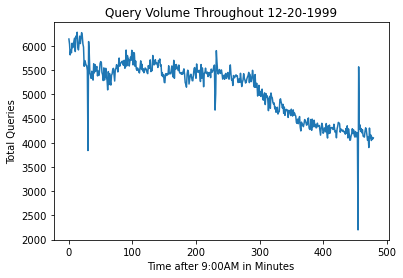

In [48]:
#plotting the total queries on the y-axis and the time of the queries on the x-axis
plt.plot(labels, values)
plt.xlabel('Time after 9:00AM in Minutes')
plt.ylabel('Total Queries')
plt.title('Query Volume Throughout 12-20-1999')
plt.show()

The dataset provided the time as a 6 digit number with the hours, minutes and seconds.  I used the hours and minutes and converted the time to the number of minutes after 9:00 AM.  The highest number of queries is in the morning around 9:00 AM.  Then throughout the day the number of queries decreases and is the lowest around 4:45 PM. The dataset is from a Monday so it makes sense that the maximum number of people are probably on the computer in the morning due to work.  Also, it is around the holiday season so more people may also be online if on vacation. The number of queries randomly spikes up and down three times around 9:30 AM, 1:30 PM, and 4:30 PM.  I'm assuming these spikes are not signficant and may be just how the data was organized or collected.

### Q19. What are the most popular websites mentioned in the queries?

In [49]:
#https://academicguides.waldenu.edu/library/internetbasics/webaddresses

#looking for queries containing .com, .org, .edu and .gov
websites = re.compile(r'\w+\.(com|org|edu|gov)\b')

#using counter to count the number of queries
querySites = Counter()
for w in query2:
    querySites.update([match.group() for match in websites.finditer(w)])

In [50]:
#print the 30 most common/popular websites
querySites.most_common(30)

[('yahoo.com', 2841),
 ('hotmail.com', 1754),
 ('amazon.com', 1074),
 ('aol.com', 1057),
 ('excite.com', 773),
 ('bluemountain.com', 629),
 ('geocities.com', 523),
 ('ebay.com', 392),
 ('weather.com', 371),
 ('wwf.com', 365),
 ('nick.com', 338),
 ('nfl.com', 324),
 ('msn.com', 318),
 ('iwon.com', 316),
 ('sex.com', 308),
 ('pokemon.com', 288),
 ('pch.com', 285),
 ('gay.com', 278),
 ('playboy.com', 245),
 ('mtv.com', 240),
 ('priceline.com', 224),
 ('espn.com', 223),
 ('disney.com', 214),
 ('ampland.com', 203),
 ('microsoft.com', 189),
 ('etoys.com', 188),
 ('foodtv.com', 175),
 ('wcw.com', 172),
 ('monster.com', 171),
 ('toysrus.com', 165)]

Because the dataset is from 1999, we can see a lot of websites that used to be popular such as yahoo, hotmail, and aol. We also see many relevant websites such as espn and ebay. Similar to the popular queries and non-stop words, many inappropriate websites also top the list.

### Q20. Estimate the percentage of queries that are about sports?

In [51]:
#https://games4esl.com/list-of-sports/
#https://www.rookieroad.com/sports/alphabetical-sports-list-a-z/
#https://www.espn.com
#https://bleacherreport.com/articles/979699-the-50-most-popular-teams-in-sports
#https://www.buzzfeed.com/andrewziegler/heres-what-the-best-athletes-of-the-90s-look-lik
#https://cpb-us-w2.wpmucdn.com/sites.uwm.edu/dist/9/188/files/2016/05/p2009_2-2l8jf7g.pdf
#https://bleacherreport.com/articles/2342236-15superstar-athletes-that-90s-kids-loved

#creating a list of sports keywords
sports = ['basketball', 'football', 'golf', 'volleyball', 'baseball', 'tennis', 'paintball', 'sport',
          'tennis', 'snowboard', 'ski', 'swim', 'boxing', 'martial arts', 'soccer', 'hockey', 'nfl', 'nba', 'ncaa', 
          'mlb','olympic', 'nascar', 'wrestle', 'wrestling', 'surf', 'super bowl', 'world series', 'playoffs', 
          'badminton','skate', 'skating', 'archery', 'gymnastic', 'judo', 'kickbox', 'cricket', 'pool', 'dart', 
          'ping pong', 'horse riding', 'fencing', 'taekwondo', 'scuba', 'bungee jumping', 'crossfit', 'javelin', 
          'kickball', 'lacrosse','racquetball', 'track', 'weightlift', 'racing', 'wwe', 'mma', 'shaq', 'kobe', 
          'manchester united', 'yankees', 'spurs', 'lakers', 'bulls', 'real madrid', 'sacramento kings', 'packers',
          'cowboys', 'red sox', 'red wings', 'giants', 'pro bowl', 'probowl', 'arsenal', 'steelers', 'phillies',
          'f.c. barcelona', 'montreal canadiens', 'knicks', 'maple leafs', 'blue devils', '49er', 'celtics', 
          'kentucky wildcats', 'miami heat', 'players', 'chicago bears', 'a.c. milan', 'jets', 'tar heels', 'longorns',
          'liverpool', 'cardinals', 'patriot', 'mavericks', 'new york rangers', 'new orleans saints', 'trailblazers', 
          'agassi', 'sampras', 'mark mguire', 'jordan', 'tyson', 'sosa', 'rookie', 'canseco', 'favre', 'hardaway', 
          'larry bird','gretzky', 'jerry rice', 'kerrigan', 'harding', 'kwan', 'rodman', 'dawes', 'ewing', 'seles',
          'randy johnson', 'ronaldo', 'griffey', 'tiger woods', 'deion sanders', 'holyfield', 'barkley', 'michael jordan',
          'jordan', 'barry sanders', 'jeff gordon', 'laettner', 'flyers', 'trailblazers', 'new orleans saints', 'ray allen'
          'divac', 'chris webber', 'skater', 'tony hawk', 'equipment', 'bodybuilding', 'trek', 'helmet', 'afc', 'nfc'
           'sportsbook', 'eastern conference', 'western conference', 'league', 'player', 'lapinski', 'standing', 'roster',
          'nhl', 'grant hill', 'emmitt', 'wcw', 'nwo', 'hogan', 'wwf', 'the rock', 'stone cold', 'steve austin', 'mcmahon'
          'triple h', 'shawn michaels', 'kane', 'the undertaker', 'albert belle', 'earnhardt', 'elway', 'goldberg', 
          'chris jericho', 'tim duncan']

In [52]:
#adding a column that counts the number of sports terms found in each query
data2['num_sports'] = data2['query_lowercase'].apply(lambda x: len([word for word in x.split() if word in sports]))
data2.head()

,Timestamp,Userid,FirstRank,Query,query_lowercase,num_stopwords,num_sports
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...,in what year did baseball become an offical sp...,4,1
1,90000,95A33E619934A39B,0,wirehair pointing griffon,wirehair pointing griffon,0,0
2,90000,E613C21C535BC636,30,ncic,ncic,0,0
3,90000,00CD4DE085A391DD,0,+ER +home +TV +Romano +picture,+er +home +tv +romano +picture,0,0
4,90000,5F48819400DB52D7,0,adolescent won't sleep in own bed,adolescent won't sleep in own bed,3,0


In [53]:
#deleting any rows that do not contain any sports terms
data_sports = data2[data2['num_sports'] != 0]
data_sports.head()

,Timestamp,Userid,FirstRank,Query,query_lowercase,num_stopwords,num_sports
0,90000,B0A0F80A06A3AB6C,0,In what year did baseball become an offical sp...,in what year did baseball become an offical sp...,4,1
57,90000,96A94B010C6501AA,10,football graduate assistanships,football graduate assistanships,0,1
241,90002,690049C16668218F,0,bretton woods ski,bretton woods ski,0,1
294,90002,A96982AC2DDF5965,10,hockey tournaments quebec city,hockey tournaments quebec city,0,1
338,90003,80E00221481F876F,0,basketball terminology,basketball terminology,0,1


In [54]:
#counting the number of rows and printing the number of queries that contain sports terms
queries_sports = len(data_sports)
print(f'{queries_sports} queries are about sports')

44159 queries are about sports


In [55]:
#print results
print(f'The percentage of queries about sports is: {"{:.2%}".format(queries_sports/n_queries)}')

The percentage of queries about sports is: 1.80%


To find queries that are about sports, I used the same method I used to find the queries that contain stop words like in question 8.  I created a general list of sports keywords and counted the queries that countained these words.  The keywords included names of sports such as "football" and "basketball", famous sports personalities (ex. shaq) and sports leagues (ex. nfl). I searched through the links provided above for many of the sports keywords and also added a few of my own words. I don't belive my list is very comprehensive as it could have definitely included more sports terms and countless names of players. Also, I did not account for sentence context and mispelled words.  Therefore, I believe a percentage of 1.80% for the number of spors queries greatly underrepresents the actual percentage of sports related queries.

#### References


https://towardsdatascience.com/speed-testing-pandas-vs-numpy-ffbf80070ee7

https://stackoverflow.com/questions/32376901/finding-average-length-of-strings-in-a-list/32377030

https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings

https://stackoverflow.com/questions/63184780/python-convert-each-element-to-string-in-a-list-without-using-for-loop

https://www.kite.com/python/answers/how-to-check-if-a-string-is-upper,-lower,-or-mixed-case-in-python

https://www.geeksforgeeks.org/python-count-of-elements-matching-particular-condition/

https://stackoverflow.com/questions/3594514/how-to-find-most-common-elements-of-a-list

https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

https://docs.python.org/3/tutorial/datastructures.html

https://docs.python.org/3/library/re.html

https://games4esl.com/list-of-sports/

https://www.rookieroad.com/sports/alphabetical-sports-list-a-z/

https://www.espn.com/

https://bleacherreport.com/articles/979699-the-50-most-popular-teams-in-sports

https://www.buzzfeed.com/andrewziegler/heres-what-the-best-athletes-of-the-90s-look-lik

https://cpb-us-w2.wpmucdn.com/sites.uwm.edu/dist/9/188/files/2016/05/p2009_2-2l8jf7g.pdf

https://bleacherreport.com/articles/2342236-15superstar-athletes-that-90s-kids-loved